# Cómo recopilar y organizar los datos

En la gestión de calidad, es crucial basarse en hechos, y para ello, es fundamental tomar muestras adecuadas de la población y procesar estadísticamente los datos obtenidos de manera correcta.

En este capítulo, aprenderemos sobre la recopilación y el resumen de datos, con el objetivo de que el estudiante sea capaz de hacer lo siguinte:

* Explicar el muestreo de una población final (distribución hipergeomética).

* Describir los tipos de muestreo (muestreo en dos etapas, muestreo estratificado, muestreo por conglomerados, muestreo sistemático, etc.) y la configuración del muestreo, incluyendo errores y costos.

[Audio_1](https://drive.google.com/file/d/1SEmorOiwYV0Iy8d5meXeBdzAObuBzEej/view?usp=drive_link)

In [1]:
import os

try:
  os.chdir('../Python/QCKentei')
except:
  pass

path = os.getcwd()


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib


## 01-01 Distribución hipergeométrica
超幾何分布

* **Distribución hipergeométrica**: La población se puede dividir en dos grupos, aquellos que tienen una cierta característica y aquellos que no la tienen (como productos conformes- no conformes, etc.)

* Muestreo con reemplazo 復元抽出:
Seguir una **distribución binomial** 二項分布

* Muestreo sin reemplazo 非復元抽出:
Seguir una **distribución hipergeométrica** 超幾何分布

* La **probabilidad Pr(x)** de que aparezcan **x unidades no conformes** en una **muestra de tamaño n** extraida alatoriamente de **un lote de tamaño N** con una **proporción de unidades no conformes P** es:

  * $ Pr(x) = \frac{{}_{N-NP}C_{n-x} \times {}_{NP} C_x }{ {}_{N} C_n} $


* Vaor esperado
  * E(x) = nP

* Varianza
   * $ V(x) = np(1-np)\bigl( \frac{N-n}{N-1} \bigr) $

* Corrección para población finita
有限修正

  * $ \bigl( \frac{N-n}{N-1} \bigr) $

  [Audio_2](https://drive.google.com/file/d/1mEqTtGS0RSzHf4WuMtp0CobNy00xIVer/view?usp=drive_link)


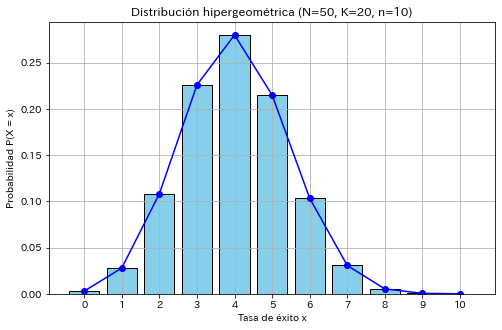

In [3]:
from scipy.stats import hypergeom

# 母集団の定義
N = 50    # 母集団のサイズ
K = 20    # 母集団中の成功数
n = 10    # 抽出するサンプル数

# x の取りうる値（最大でも min(K, n) まで）
x = np.arange(0, min(K, n) + 1)

# 超幾何分布の確率質量関数（PMF）
pmf_values = hypergeom.pmf(x, N, K, n)

# グラフ描画
plt.figure(figsize=(8, 5))
plt.bar(x, pmf_values, color='skyblue', edgecolor='black')
plt.plot(x, pmf_values, 'o-', color='blue')
plt.title(f'Distribución hipergeométrica (N={N}, K={K}, n={n})')
plt.xlabel('Tasa de éxito x')
plt.ylabel('Probabilidad P(X = x)')
plt.grid(True)
plt.xticks(x)
plt.show()


## 01-02 Muestreo de una población finita
有限母集団からのサンプリング

### 1. Propósito del muestreo

#### (1) Tipos de datos

* **Valores medibles** (valores continuos)
* **Valores contables** (valores discretos o discontinuos)

#### (2) Población y Muestreo
母集団とサンプル

La idea más fundamental del pensamiento estadístico es el **concepto de población**.
Cuando se investiga algún problema, se **toma una muestra de esa población** y **se realizan observaciones e investigaciones sobre ella**.
Y basándose en los hechos obtenidos sobre la muestra, se **realiza una estimación de la población**.

Tipos de muestreo:
* **Muestreo intencional**: Muestrear de una parte específica de la población
* **Muestreo aleatorio**: Extraer de manera amorosa

Método de Muestreo

* Muestreo aleatorio simple
単純ランダムサンプリング

* Muestreo en dos etapas
２段サンプリング

* Muestreo estratificado
層別サンプリング

* Muestreo por conglomerados
集落サンプリング

* Muestreo sistemático
系統サンプリング

Diseño del método de muestreo (precisión y costo)

#### (3) Estructura del error
誤差の構造

$ x = \mu + s + m $

$ \sigma^2 = \sigma_s^2 + \sigma_m^2 $

### 2. Muestreo aleatorio simple

Método de muestreo en el que todas las combinaciones posibles de tomar una muestra de la población tienen la misma probabilidad de ser seleccionadas.

$ V(\bar{x}) = \frac{N - n}{N - 1} \cdot \frac{\sigma^2}{n} \fallingdotseq (1 - \frac{n}{N}) \cdot \frac{\sigma^2}{n} $

### 3. Muestreo en dos etapas

El muestreo en dos etapas (también conocido como muestreo bi-etápico o muestreo por etapas) es un método de muestreo probabilístico que se utiliza cuando la población está organizada en grupos o unidades primarias. Consiste en dos fases de muestreo aleatorio.


$ V(\bar{x}) = \frac{M-m}{M-1} \cdot \frac{\sigma_b^2}{m} + \frac{N - n}{N -1} \cdot \frac{\sigma_w^2}{mn}$

### 4. Muestreo estratificado

Cuando una población está compuesta por múltiples elementos heterogéneos, se estratifica (o divide en estratos/unidades primarias), y se denomina muestreo estratificado al método de muestreo en el que se realiza un muestreo aleatorio de unidades secundarias de cada uno de estos estratos.

$ V(\bar{x}) = \frac{M-m}{M-1} \cdot \frac{\sigma_b^2}{m} + \frac{N - n}{N -1} \cdot \frac{\sigma_w^2}{Mn} = \frac{N - n}{N - 1} \cdot \frac{\sigma_w^2}{Mn} $

### 5. Muestreo por conglomerados

Cuando se realiza una investigación social que abarca una amplia zona geográfica, el método de muestreo por conglomerados (o muestreo por racimos) consiste en considerar ciudades, pueblos o aldeas como unidades de muestreo únicas (conglomerados: unidades primarias). Se seleccionan aleatoriamente varios de estos conglomerados, y luego se investiga a la totalidad de los elementos dentro de esos conglomerados (unidades secundarias).

$ V(\bar{x}) = \frac{M-m}{M-1} \cdot \frac{\sigma_b^2}{m} + \frac{N - n}{N -1} \cdot \frac{\sigma_w^2}{mn}  = \frac{M - m}{M - 1} \cdot \frac{\sigma_b^2}{m} $

[Audio_3](https://drive.google.com/file/d/1qUXOcRq_C-18P4R8Y7QKYyAe9Y3uYatr/view?usp=drive_link)


## 1.1

ひと箱25個入りの洗顔ソープを一ロット200箱として出荷している。出荷検査で洗顔ソープ1個の重量 $ x $ (g)を測定しており、重量の箱間のバラつきは $ \sigma_b = 2.8 $ (g)であり、箱内のバラつきは $ \sigma_w = 1.2 $ (g)で安定状態にある。ひと箱を開梱して再梱包するのに$ k_1 = 210 $ 円の費用がかかり、１箱を検査して再梱包するのに $ k_2 = 15 $ 円の費用がかかる。その他の費用や測定誤差は無視できるものとする。

全体 $ 25 \times 25 = 5000 $ 個から10個をサンプリングする単純ランダムサンプリング法と、200箱から5箱を選び、その箱から各2個の合計10個を検査する2段サンプリング法について、洗顔ソープ1個の重量 $ x $ の平均値とサンプリングの総費用を比較せよ


Se envian lotes de 200 cajas de jabón facial, Cada una con 25 unidades. Para la inspección de envío, se mide el peso $ x $ (g) de cada jabón facial. La variación entre cajas es $ \sigma_b = 2.8 $ (g), y la variación dentro de las cajas es $ \sigma_w = 1.2 $ (g), manteniéndose estables. El costo de abrir y volver a empaquetar una caja es $ k_1 = 210 $ yenes, y el costo de inspeccionar y volver a empaquetar una caja $ k_2 = 15 $ yens. Se supone que otros costos y errores de medición son insignificantes.

Comparar la media del peso $ x $ de los jabones faciales y el costo total de muestreo en los siguientes dos métodos:
1. Muestreo aleatorios simple de 10 jabones de un total de 5000 unidad (200 x 25)
2. Muestreo en dos etapas, donde se seleccionan 5 cajas de las 200 disponibles, y se toman 2 jabones de cada una, sumando un total de 10 unidades para la inspección.

In [4]:
# Parámetros definidos
sigma_b = 2.8  # Variación entre cajas (g)
sigma_w = 1.2  # Variación dentro de las cajas (g)
k1 = 210       # Costo de abrir y volver a empaquetar una caja (g)
k2 = 15        # Cost de inspeccionar y volver a empaquetar una caja (yenes)
M = 200        # Número de cajas en el lote (200)
N = 25         # Número de jabones por caja (25)
total_soaps = M * N  # Número total de jabones (5000 unidades)

### 1. Muestreo aleatorio simple


$ V(\bar{x}) = \frac{MN - m}{MN -1} \cdot \frac{\sigma_b^2 + \sigma_w^2}{n} $

$ T_{max} = (k_1 + k_2) n $

$ T_{min} = k_1 + k_2 \cdot n $

In [5]:
# Varianza
n = 10 # Número total de jabones a inspeccionar
var = (sigma_b**2 / n) + (sigma_w**2 / n)

# Corrección para población finita
adj = (M*N -n)/(M*N -1)

# Cálculo de la varianza con la corrección para población finita
var_finite = var * adj
var_finite = np.sqrt(var_finite)

print("Muestreo aleatorio simple")
print(f"Varianza de la media del peso x de un jabón facial: {var_finite:.3f} g^2")

# 1. Cuando todos los jabones faciales se seleccionan de cajas diferentes (selección de 10 cajas)
sample_size = 10
cost_diff_boxes = (sample_size * k1) + (sample_size * k2)

# 2. Cuando todos los jabones faciales se seleccionan de una sola caja (selección de 10 jabones de una caja)
cost_same_box = k1 + (sample_size * k2)

print(f"Costo total cuando todos los jabones faciales se seleccionan de cajas diferentes: {cost_diff_boxes} Yenes")
print(f"Costo total cuando todos los jabones faciales se seleccionan de una sola caja: {cost_same_box} yenes")



Muestreo aleatorio simple
Varianza de la media del peso x de un jabón facial: 0.962 g^2
Costo total cuando todos los jabones faciales se seleccionan de cajas diferentes: 2250 Yenes
Costo total cuando todos los jabones faciales se seleccionan de una sola caja: 360 yenes


### 2. Muestreo en dos etapas

$ V(\bar{x}) = \frac{M-m}{M-1} \cdot \frac{\sigma_b^2}{m} + \frac{M-n}{N-1} \cdot \frac{\sigma_w^2}{mn}$

$ T = k_1 m + k_2 m n $


In [6]:
# Varianza de la variación entre cajas y dentro de las cajas
m = 5
n = 2
variance_2stage = (sigma_b**2 / m)*(M - m)/(M - 1) + (sigma_w**2 / (m * n)*(N - n)/(N -1))
variance_2stage = np.sqrt(variance_2stage)
print(f"\nVarianzá de la media en el muestreo en dos etapas: {variance_2stage:.3f} g^2")

# Método de muestreo 2: Muestreo en dos etapas
sample_size_2stage = m*n
cost_2stage = k1 * m + k2 * sample_size_2stage  # Costo de apertura + inspección
print(f"Costo total de método de muestreo en dos etapas: {cost_2stage} Yen")



Varianzá de la media en el muestreo en dos etapas: 1.294 g^2
Costo total de método de muestreo en dos etapas: 1200 Yen


Existen muchas combinaciones de $ m $ y $ n $ que cumplen con la precisión deseada al diseñar un muestreo.
Por esta razón, es recomendable determinar $ m $ y $ n $ de tal forma que el costo sea mínimo para una misma precisión, o que la precisión sea máxima para un mismo costo.
A esta forma de determinar $ m $ y $ n $ se le llama **asignación óptima de la muestra**.
Además, el costo $ T $ que se calcula aquí se denomina **función de costo**.

[Audio_4](https://drive.google.com/file/d/1Owo6uGTo1DdGOCPjhZS66YH8epuwmGBZ/view?usp=drive_link)

## Por favor, responda a las preguntas del examen de práctica a través del siguiente enlace.


[Simulacro de examen](https://forms.gle/CGkQ6G8KzEA8B29E8)

## 6.1

### Distribución hipergeométrica

要素の数 $ N $ 個のうち不適合品が $ M $ 個である有限母集団からランダムに $ n $ 個を抜き取る非復元抽出を行う場合、その中に含まれる不適合品の個数 $ x $ は超幾何分布に従う。

Cuando se realiza un **muestreo sin reemplazo** de $ n $ elementos de una población finita de $ N $ elementos, en la cual hay $ M $ elementos defectuosos, el número de elementos defectuosos $ x $ en la muestra sigue una **distribución hipergeométrica**.

La esperanza y la varianza de una variable aleatoria $ x $ que sigue una distribución hipergeométrica

$ E(x) = \frac{nM}{N} $

$ V(x) = \frac{nM}{N}  (1 - \frac{M}{N}) (\frac{N-n}{N-1}) $

Si $ P = M/N $ se considera la tasa de defectuosos en la población, entonces la esperanza y la varianza mencionadas anteriormente son:

$ E(x) = nP $

$ V(x) = np(1-P)(\frac{N-n}{N-1}) $

Corrección finita (corrección por población finita: $ (\frac{N-n}{N-1}) $



Valor esperado (E[X]): 4.00
Varianza (Var(X)): 1.96


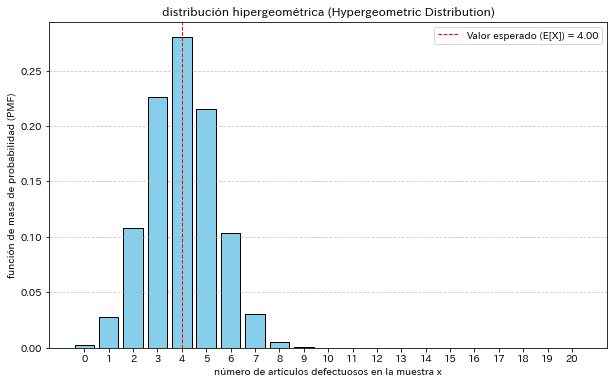

In [7]:
from scipy.stats import hypergeom

# Configuración de parámetros
N = 50  # Tamaño total de la problación
M = 10  # Número de elementos defectuosos
n = 20  # Número de muestras a extraer

# distribución hipergeométrica
rv = hypergeom(N, M, n)

# Valor esperado y Varianza
expected_value = n * M / N
variance = (n * M / N) * (1 - M / N) * ((N - n) / (N - 1))

#
print(f"Valor esperado (E[X]): {expected_value:.2f}")
print(f"Varianza (Var(X)): {variance:.2f}")

# función de masa de probabilidad (PMF)
x = np.arange(0, n + 1)

# Cálculo de la función de masa de probabilidad (PMF) para cada x

pmf = rv.pmf(x)

# Creación del gráfico
plt.figure(figsize=(10, 6))
plt.bar(x, pmf, color='skyblue', edgecolor='black')
plt.title('distribución hipergeométrica (Hypergeometric Distribution)')
plt.xlabel('número de artículos defectuosos en la muestra x')
plt.ylabel('función de masa de probabilidad (PMF)')
plt.xticks(np.arange(0, n + 1, 1))  #
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Valor esperado y Varianza
plt.axvline(expected_value, color='red', linestyle='dashed', linewidth=1, label=f'Valor esperado (E[X]) = {expected_value:.2f}')
plt.legend()
plt.show()


### Distribución binomial

有限母集団からの復元抽出を行う場合には $ x $ は二項分布に従う。

Cuando se realiza un **muestreo con reemplazo** de una población finita, $ x $ sigue una **distribución binomial**.


$ E(x) = nP $

$ V(x) = np(1-np) $


超幾何分布は、$ P = M/N $ を一定にして $ N -> \infty $ とすれば、その極限分布は二項分布になる。従って、無限母集団の場合には、$ x $ は二項分布に従う。実用的には、$ n /N \leq 0.10 $ の時には近似的に二項分布とみなされることが多い。

Distribución Hipergeométrica: Aproximación a la Binomial

La distribución hipergeométrica tienda a la distribución binomial como límite cuando se mantiene la proporción $ P = M/N $ constante y $ N $ (el tamaño de la población) tiende a infinito ($ N -> \infty $).
Por lo tanto, en el caso de una población infinita, la variable aleatoria $ x $ sigue una distribución binomial.

En la práctica, se considera frecuentemente que la distribución se aproxima a la binomial cuando la proporción de la muestra con respecto a la población es pequeña, generalmente cunando $ n /N \leq 0.10 $.

Valor esperado (E[X]): 4.00
Varianza (Var(X)): 3.20


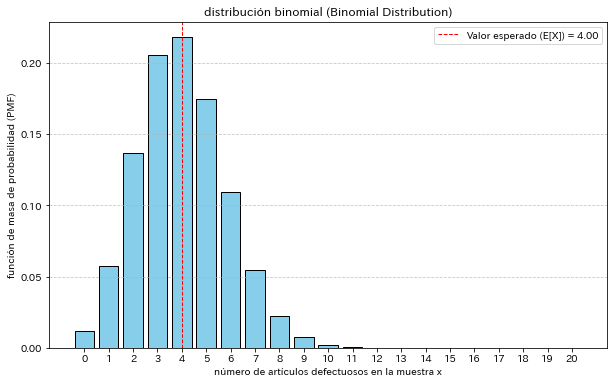

In [8]:
from scipy.stats import binom

# Configuración de parámetros
N = 50  # Tamaño total de la población
M = 10  # Número de elementos defecuosos
n = 20  # Número de muestras a extraer

# Cálculo de la probabilidad de éxito
p = M / N  # Probabilidad de extraer elementos defectuosos

# distribución binomial
rv = binom(n, p)

# Valor esperado, Varianza
expected_value = n * p
variance = n * p * (1 - p)

#
print(f"Valor esperado (E[X]): {expected_value:.2f}")
print(f"Varianza (Var(X)): {variance:.2f}")

# función de masa de probabilidad (PMF)
x = np.arange(0, n + 1)

# Cálculo de la función de masa de probabilidad (PMF) para cada x
pmf = rv.pmf(x)

# Creación del gráfico
plt.figure(figsize=(10, 6))
plt.bar(x, pmf, color='skyblue', edgecolor='black')
plt.title('distribución binomial (Binomial Distribution)')
plt.xlabel('número de artículos defectuosos en la muestra x')
plt.ylabel('función de masa de probabilidad (PMF)')
plt.xticks(np.arange(0, n + 1, 1))  #
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Valor esperado y Varianza
plt.axvline(expected_value, color='red', linestyle='dashed', linewidth=1, label=f'Valor esperado (E[X]) = {expected_value:.2f}')
plt.legend()
plt.show()


## 6.2

A工場に入荷する光学機器部品は、ひと箱に $ N=120 $ 入りで、$ M=12 $ 箱ずつ納入される。部品の特性 $ x $ が重要であるので、部品サンプリングを行い、特性 $ x $ の値を測定し平均値を求めている。納品される箱間の特性 $ x $ の分散を $ \sigma_b^2 $、箱内部品の特性 $ x $ の分散を $ \sigma_w^2 $、また $ \sigma_b^2 + \sigma_w^2 = \sigma^2 $ として、各サンプリングを検討する。

なお、$ \sigma_b^2 = 2^2 $, $ \sigma_w^2 = 1^2  $ とする。

Las piezas de los equipos ópticos que llegan a la fábrica A se entregan en cajas con $ N=120 $ piezas por caja, y $ M=12 $ cajas por entrega. Dado que la característica $ x $ de las piezas es importante, se realiza un muestreo de las piezas para medir el valor de la característica $ x $ y calcular el valor promedio. Se examinarán las muestras, considerando la varianza de la carácteristica $ x $ entre las cajas, $ \sigma_b^2 $, la varianza de la característica $ x $ dentro de las piezas de una caja, $ \sigma_w^2 $, y la relación $ \sigma_b^2 + \sigma_w^2 = \sigma^2 $.

Se debe que $ \sigma_b^2 = 2^2 $, $ \sigma_w^2 = 1^2 $.



### Muestreo en dos etapas
２段サンプリング

1. 入荷した $ M=12 $箱の中からランダムに $ m=4 $ 箱選び、選ばれた各箱内の部品 $ N=120 $ 個の中かられランダムに $ n=60 $ 個選んで、合計 $ mn=240 $ 個の特性 $ x $ をそれぞれ測定した。得られた特性 $ x $ の平均値を求める。

1. Se seleccionaron aleatoriamente $ m=4 $ cajas de las $ M=12 $ cajas recibidas, y dentro de cada una de las cajas seleccionadas, se eligieron aleatoriamente $ n=60 $ piezas de las $ N=120 $ piezas. En total, se midieron las características $ x $ de $ mn=240 $ piezas. Se debe calcular el valor promedio de la característica $ x $ obtenida.

**Muestreo en dos etapas**: Es un método en el que, cuando la población se divide en unidades primarias, primero se muestran aleatoriamente las unidades primarias y luego, a partir de cada una de las unidades primarias obtenidas, se muestran aleatoriamente las unidades secundarias.

En el caso de esta pregunta, la caja es la **unidad primaria** y la pieza es la **unidad secundaria**.
La primera extracción de muestra aquí se llama **muestreo primario**, y la siguiente extracción se llama **muestreo secundario**.

Varianza $ V(\bar{x} $) de la media $ \bar{x} $ de la característica $ x $ en el muestreo de dos etapas para una población finita:

$ V(\bar{x}) = \frac{M-m}{M-1} \cdot \frac{\sigma_b^2}{m} + \frac{N-n}{n-1} \cdot \frac{\sigma_w^2}{mn} $

Como se trata de una **población finita**, se incluye el **coeficiente de corrección por población finita**.

[Audio_1](https://drive.google.com/file/d/19MCMphCJd8lTiNpCh2Dq04whIzblE1hG/view?usp=drive_link)

In [9]:
# Configuración de constantes
M = 12  # Número de cajas
N = 120  # Número de piezas en cada caja
MN = M * N  # Total de piezas
m = 4   # Número de cajas seleccionadas
n = 60  # Número de piezas seleccionadas de cada caja
sigma_b2 = 4  # Varianza entre cajas
sigma_w2 = 1  # Varianza dentro de cada caja

# Se asume que la media poblacional es 100
mu = 100

# Cálculo de la varianza (aplicando la corrección por población final)
var_between = (sigma_b2 / m)*((M-m)/(M-1))  # Varianza entre cajas
var_within = (sigma_w2 / (m * n)) * ((N - n) / (N - 1))  # Varianza total (con corrección por población finita aplicada)

# Varianza
total_variance = var_between + var_within
print(f"Valianza total: {np.sqrt(total_variance):.2f}^2")

Valianza total: 0.85^2


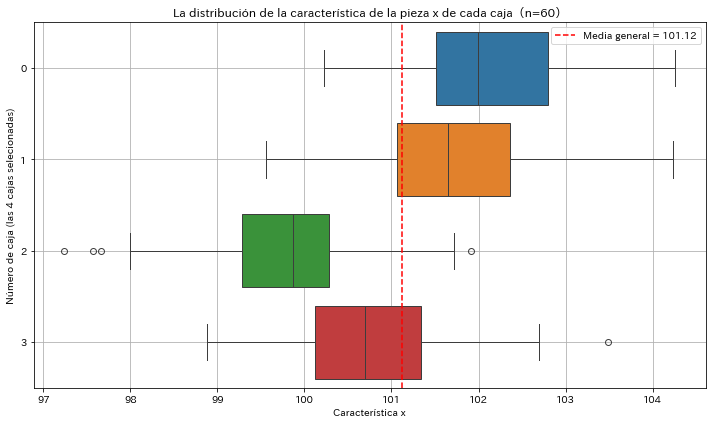

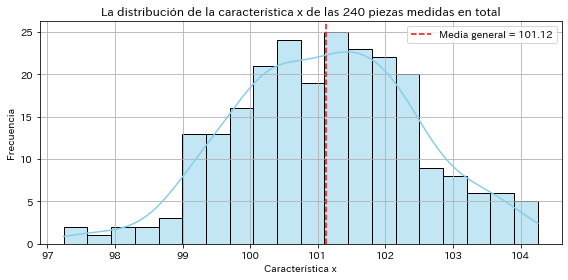

In [10]:
# Las medias poblacionales de cada caja（distribución normal：Varianza entre cajas σ_b^2）
np.random.seed(0)
box_means = np.random.normal(loc=mu, scale=np.sqrt(sigma_b2), size=M)

# Seleccionar m cajas al azar
selected_box_indices = np.random.choice(M, size=m, replace=False)
selected_means = box_means[selected_box_indices]

# Seleccionar y medir n piezas al azar（distribución：varianza intra-cajaσ_w^2）
samples = []
for mean in selected_means:
    part_samples = np.random.normal(loc=mean, scale=np.sqrt(sigma_w2), size=n)
    samples.append(part_samples)

samples = np.array(samples)  # shape = (m, n)
all_samples = samples.flatten()

# Media global de las mediciones
overall_mean = np.mean(all_samples)

# Visualización：Varianza por Caja
plt.figure(figsize=(10, 6))
sns.boxplot(data=samples.T, orient='h')
plt.title('La distribución de la característica de la pieza x de cada caja（n=60）')
plt.xlabel('Característica x')
plt.ylabel('Número de caja (las 4 cajas selecionadas)')
plt.axvline(overall_mean, color='red', linestyle='--', label=f'Media general = {overall_mean:.2f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Histograma：Distribución general
plt.figure(figsize=(8, 4))
sns.histplot(all_samples, bins=20, kde=True, color='skyblue')
plt.axvline(overall_mean, color='red', linestyle='--', label=f'Media general = {overall_mean:.2f}')
plt.title('La distribución de la característica x de las 240 piezas medidas en total')
plt.xlabel('Característica x')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Muestreo por conglomerados
集落サンプリング

2. 入荷した $ M=12 $ 箱の中からランダムに $ m=2 $ 箱をえらび、選ばれた各箱内の部品 $ N=120 $ 個をすべて選んで、合計 $ mN = 240 $ の特性 $ x $ をそれぞれ測定した。得られた特性 $ x $ の平均値 $ \bar{x} $ を求める。

2. Se seleccionaron aleatoriamente $ m=2 $ cajas de un total de $ M=12 $ cajas recibidas. Luego, se eligieron todos los $ N=12 $ cajas recibidos. Luego, se eligieron todos los $ N=120 $ componentes dentro de cada caja seleccionada, midiendo así un total de $ mN=240 $ valores de la característica $ x $. Finalmente, se calculó el valor medio $ \bar{x} $ de la característica $ x $ obtenida.

**Muestreo por Conglomerados**:
Es un método en el que, cuando una población se divide en unidades primarias, se seleccionan aleatoriamente algunas de estas unidades primarias y luego se investigan todas las unidades secundarias contenidas en las unidades primarias seleccionadas.

La **unidad primaria** corresponde a un **conglomerado** (o cluster).
En el **muestreo por conglomerados**, se investigan algunos conglomerados como representación.
Por lo tanto, cuanto más se parezcan los conglomerados entres sí, mejor será la **precisión** del muestreo.

$ V(\bar{x}) = \frac{M-m}{M-1} \cdot \frac{\sigma_b^2}{m} $

Dado que no existe el término $ \sigma_w^2 $, cuanto menor sea $ \sigma_b^2 $, menor será $ V(\bar{x}) $.


[Audio_2](https://drive.google.com/file/d/1ig1daLcPoVBZ7eNPDl9Dw9uKSZT6Qxr7/view?usp=drive_link)

In [11]:
m = 2

# Cálculo de la varianza (aplicando la corrección por población final)
var_between = (sigma_b2 / m)*((M-m)/(M-1))  # Varianza entre cajas

# Varianza
total_variance = var_between
print(f"Valianza total: {np.sqrt(total_variance):.2f}^2")

Valianza total: 1.35^2


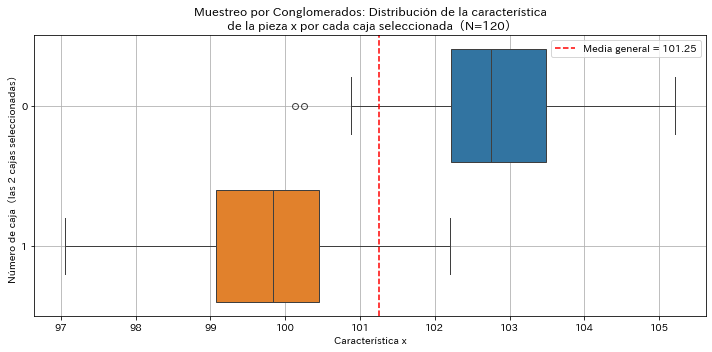

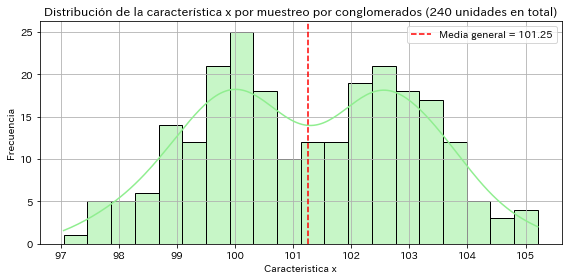

In [12]:
# Se seleccionanaleatoriamente m cajas (o conglomerados)
selected_indices = np.random.choice(M, size=m, replace=False)
selected_means = box_means[selected_indices]

# Obtener todos los N datos de cada caja (con error)
samples = []
for mean in selected_means:
    parts = np.random.normal(loc=mean, scale=np.sqrt(sigma_w2), size=N)
    samples.append(parts)

samples = np.array(samples)  # shape = (m, N)
all_samples = samples.flatten()

# Media general
overall_mean = np.mean(all_samples)

# Visualización: Varianza por Caja
plt.figure(figsize=(10, 5))
sns.boxplot(data=samples.T, orient='h')
plt.title('Muestreo por Conglomerados: Distribución de la característica\n de la pieza x por cada caja seleccionada（N=120）')
plt.xlabel('Característica x')
plt.ylabel('Número de caja（las 2 cajas seleccionadas）')
plt.axvline(overall_mean, color='red', linestyle='--', label=f'Media general = {overall_mean:.2f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualización: Histograma
plt.figure(figsize=(8, 4))
sns.histplot(all_samples, bins=20, kde=True, color='lightgreen')
plt.axvline(overall_mean, color='red', linestyle='--', label=f'Media general = {overall_mean:.2f}')
plt.title('Distribución de la característica x por muestreo por conglomerados (240 unidades en total)')
plt.xlabel('Caracteristica x')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Muestreo estratificado
層別サンプリング

3. 入荷した $ M = 12 $ 箱すべての中からそれぞれランダムに $ n = 20 $ 個を選んで合計 $ Mn = 240 $ 個の特性 $ x $をそれぞれ測定した。得られた $ x $の平均値 $ \bar{x} $を求める。このサンプリングは層別サンプリングとよばれる。

3. Se seleccionaron aleatoriamente $ n=12 $ piezas de cada una de las $ M=20 $ cajas recibidas, obteniendo un total de $ Mn=240 $ mediciones de la característica $ x $. Se calculó el valor medio $ \bar{x} $ de los valores obtenidos. Este tipo de muestreo se denomina muestreo estratificado.

**Muestreo estratificado**: Es un método de investigación en el cual, cuando una población está dividida en unidades primarias, se seleccionan aleatoriamente unidades de todas las unidades primarias divididas para su estudio.

En el muestreo estratificado, la precisión mejora si las capas (o estratos) se hacen lo más homogéneas (uniformes) posible internamente.

$ V(\bar{x}) = \frac{N -n}{N-1} \cdot \frac{\sigma_w^2}{Mn} $

Dado que no existe el término $ \sigma_b^2 $, cuanto menor sea $ \sigma_w^2 $, menor será $ V(\bar{x}) $.

[Audio_3](https://drive.google.com/file/d/1i3_KZ1TeOovhuE9LyiWoHBwxNIodkfiP/view?usp=drive_link)

In [13]:
n = 20

# Cálculo de la varianza (aplicando la corrección por población final)
var_within = (sigma_w2 / (M * n)) * ((N - n) / (N - 1))  # Varianza total (con corrección por población finita aplicada)

# Varianza
total_variance = var_within
print(f"Valianza total: {np.sqrt(total_variance):.2f}^2")

Valianza total: 0.06^2


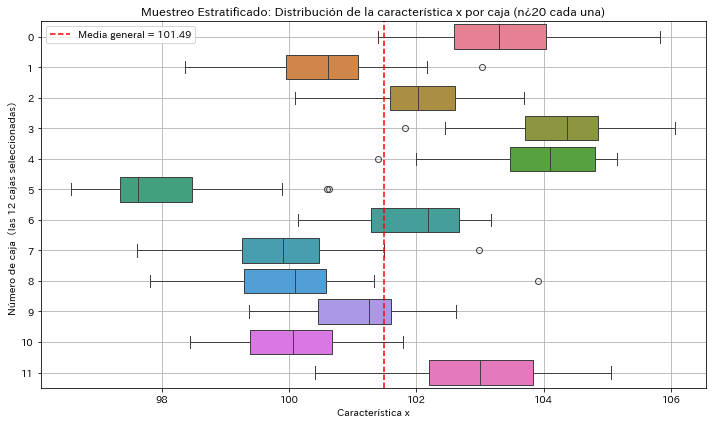

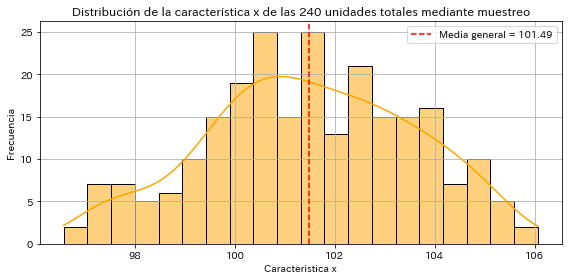

In [14]:
np.random.seed(2)  #
# Muestrear aleatoriamente n=20 unidades de cada caja.
samples = []
for mean in box_means:
    parts = np.random.normal(loc=mean, scale=np.sqrt(sigma_w2), size=n)
    samples.append(parts)

samples = np.array(samples)  # shape = (M, n)
all_samples = samples.flatten()

# Media general
overall_mean = np.mean(all_samples)

# Visualización: Diagrama de caja por estrato.
plt.figure(figsize=(10, 6))
sns.boxplot(data=samples.T, orient='h')
plt.title('Muestreo Estratificado: Distribución de la característica x por caja (n¿20 cada una)')
plt.xlabel('Característica x')
plt.ylabel('Número de caja（las 12 cajas seleccionadas）')
plt.axvline(overall_mean, color='red', linestyle='--', label=f'Media general = {overall_mean:.2f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualización: Histograma（Total: 240 unidades）
plt.figure(figsize=(8, 4))
sns.histplot(all_samples, bins=20, kde=True, color='orange')
plt.axvline(overall_mean, color='red', linestyle='--', label=f'Media general = {overall_mean:.2f}')
plt.title('Distribución de la característica x de las 240 unidades totales mediante muestreo')
plt.xlabel('Caracteristica x')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


La principal ventaja del muestreo estratificado es minimizar el impacto de la variabilidad entre las cajas, lo que reduce la dispersión total del la muestra. Esto permite mejorar la precisión incluso con un menor tamaño de muestra.

[Audio_33](https://drive.google.com/file/d/1hw3XScKYB_3CG8SZz-MIXnBW9nCUZv6E/view?usp=drive_link)

### Muestreo aleatorio simple
単純ランダムサンプリング


4. 入荷した $ MN=1440 $ 個すべての中からランダムに$ n=240 $ 個選んで２４０個の特性ｘをそれぞれ測定した。得られた特性 $ x $ の平均値 $ \bar{x} $ を求める。このサンプリングは単純ランダムサンプリングと呼ばれる。

4. Se seleccionaron aleatoriamente $ n=240 $ piezas de un total de $ MN=1440 $ piezas recibidas, y se medió la caracterítica $ x $ de cada una. Se calculó el valor medio $ \bar{x} $ de la característica $ x $ obtenida. Este tipo de muestreo se denomina muestreo aleatorio simple.

**Muestreo Aleatorio Simple**: Es un método de investigación en el que todos los elementos que componen una población son seleccionado para la muestra con la misma probabilidad.

En el caso de esta pregunta, el conjunto de todos los elementos que componen la población se refiere al tamaño de la población, y este es el producto $ MN $, donde $ M $ es el número total de unidades primarias y $ N $ es el tamaño de cada unidad primaria.

$ V(\bar{x}) = \frac{MN-n}{MN - 1} \cdot (\frac{\sigma_b^2}{n} + \frac{\sigma_w^2}{n}) = \frac{MN-n}{MN - 1} \cdot (\frac{\sigma^2}{n}) $

Por lo tanto, si se mantiene $ \sigma^2 $ constante, la varianza $ V(\bar{x}) $ de la media de la característica $ x $ es constante.

[Audio_4](https://drive.google.com/file/d/1VQOidXLuWkpedWXQzEYL9HWv05mR1t52/view?usp=drive_link)

In [15]:
n = 240       # 単純ランダムサンプル数

# Cálculo de la varianza (aplicando la corrección por población final)
sigma_2  = (sigma_b2 + sigma_w2)
var_within = (sigma_2 / n) * ((MN - n) / (MN - 1))  # Varianza total (con corrección por población finita aplicada)

# Varianza
total_variance = var_within
print(f"Valianza total: {np.sqrt(total_variance):.2f}^2")

Valianza total: 0.13^2


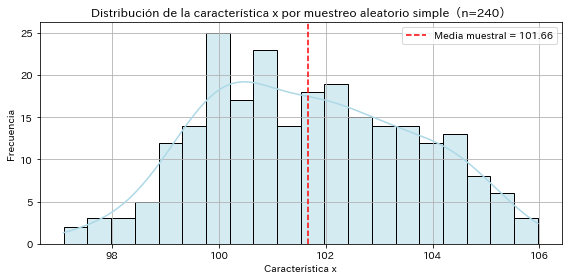

In [16]:
np.random.seed(3)
# Generar piezas de cada caja (con error interno)
population = []
for mean in box_means:
    parts = np.random.normal(loc=mean, scale=np.sqrt(sigma_w2), size=N)
    population.append(parts)

population = np.concatenate(population)  # Datos de las 1440 piezas totales

# Extracción aleatoria simple de n=240 unidades
sample = np.random.choice(population, size=n, replace=False)

# Media muestral
sample_mean = np.mean(sample)

# Visualisación：HIstograma
plt.figure(figsize=(8, 4))
sns.histplot(sample, bins=20, kde=True, color='lightblue')
plt.axvline(sample_mean, color='red', linestyle='--', label=f'Media muestral = {sample_mean:.2f}')
plt.title('Distribución de la característica x por muestreo aleatorio simple（n=240）')
plt.xlabel('Característica x')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
notebook_name = 'QCKentei1-1.ipynb'
notebook_name_html = notebook_name.replace(".ipynb",".html")
print(notebook_name + '  ->  ' + notebook_name_html)

!jupyter nbconvert --to html {notebook_name}

QCKentei1-1.ipynb  ->  QCKentei1-1.html
[NbConvertApp] Converting notebook QCKentei1-1.ipynb to html
[NbConvertApp] Writing 926546 bytes to QCKentei1-1.html
